In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print ("basic setup complete")

basic setup complete


In [2]:
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
for ob in df["species"].unique():
    print (ob)

Iris-setosa
Iris-versicolor
Iris-virginica


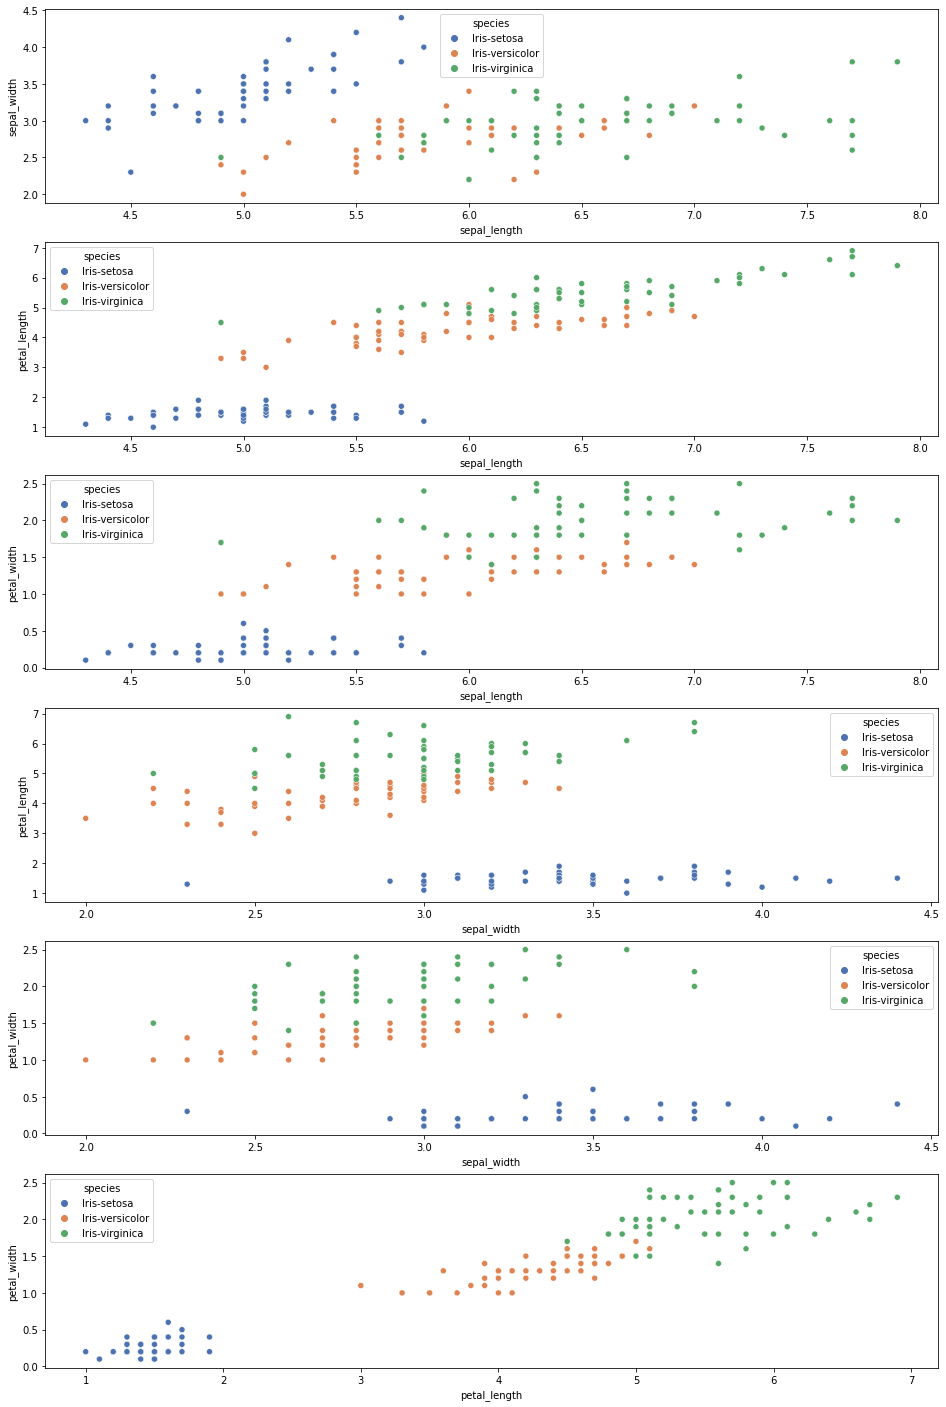

In [5]:
f, ax = plt.subplots(nrows = 6, ncols = 1, figsize = (16, 25))

where = 0
lst = df.columns.tolist()
for i in range (len(lst) - 1):
   for j in range (i + 1, len(lst) - 1):
       a = lst[i]
       b = lst[j]
       sns.scatterplot(x = df[a], y = df[b], ax = ax[where], hue = df["species"], palette = "deep")
       where += 1


In [6]:
df.shape

(150, 5)

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

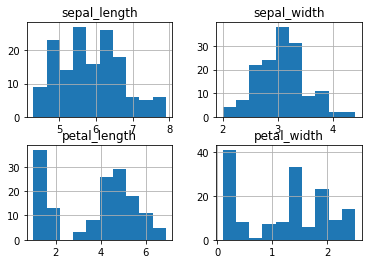

In [7]:
df.hist()

In [8]:
from mlxtend.plotting import plot_decision_regions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

class CustomKNN:
    def __init__ (X_train, X_valid, y_train, y_valid):
        self.X_train = X_train
        self.X_valid = X_valid
        self.y_train = y_train
        self.y_valid = y_valid

    def searchParams(self):
        params = {
            "n_neighbours" : [i for i in range(1, 50)]
        }
        model = KNeighborsClassifier()
        clf = GridSearchCV(model, params)
        clf.fit (self.X_train, self.y_train)
        

    def fit(self):
        pass
    def predict(self):
        pass


In [9]:
def f(x):
    if x == "Iris-setosa":
        return 0
    if x == "Iris-versicolor":
        return 1
    return 2

df["species"] = df["species"].apply(f)

In [20]:
from sklearn.model_selection import train_test_split
X = df.drop(["species"], axis = 1)
y = df["species"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y , random_state = 1, test_size = 0.28, stratify= y)

In [21]:
import warnings
warnings.filterwarnings("ignore")
params = {
            "n_neighbors" : [i for i in range(1, 50)]
        }
model = KNeighborsClassifier()
clf = GridSearchCV(model, params)
clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [22]:
print (clf.best_params_)
print (clf.score(X_valid, y_valid))

{'n_neighbors': 6}
0.9767441860465116


In [23]:
model = KNeighborsClassifier(n_neighbors = 9)
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)

from sklearn.metrics import accuracy_score
print (accuracy_score(y_pred, y_valid))

0.9767441860465116
